In [4]:
import numpy as np
W1 = np.random.randn(2, 4)

b1 = np.random.randn(4)     # broadcasting 될 예정 => (10,4)로
print(b1.shape)                
x = np.random.randn(10, 2)  # 10개의 dataset 및 2개의 feature
print(np.matmul(x, W1).shape)
h = np.matmul(x, W1) + b1   # hidden layer

(4,)
(10, 4)


완전 연결계층에 의한 변환은 `선형`변환이다.\
`비선형` 효과를 부여하는 것이 활성화 함수이다. (활성화 함수는 신경망의 표현력을 높여 준다.)\
여기서는 **sigmoid** 함수를 사용한다.\
$ \sigma(x) = \frac{1}{1+e^{-x}}$



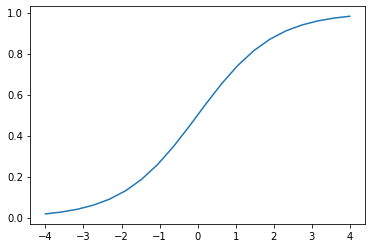

In [22]:
import matplotlib.pyplot as plt

def sigmoid(x):
    
    return 1/(1+np.exp(-x))

x = np.linspace(-4,4,20)
y = sigmoid(x)

plt.plot(x, y,)
plt.axis('tight')
plt.show()

In [35]:
import numpy as np
W1 = np.random.randn(2, 4)

b1 = np.random.randn(4)     # broadcasting 될 예정 => (10,4)로
x = np.random.randn(10, 2)  # 10개의 dataset 및 2개의 feature

h = np.matmul(x, W1) + b1   # hidden layer
a = sigmoid(h)  # activation



W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)


s = np.matmul(a, W2) + b2   # score : 확률이 되기 전의 값
print(s.shape)  #  10 : size of dataset,  3 : class 개수
print(s)

(10, 3)
[[-1.375763    1.07540906  0.79043365]
 [-1.5392087   0.53618984  1.13737809]
 [-1.73785714 -0.15732445  1.79672661]
 [-1.26341081  1.45617926  0.41838612]
 [-1.68488904 -0.00903791  1.58478072]
 [-1.63916146  0.07902332  1.48521613]
 [-1.46789883  0.80311897  0.95349206]
 [-1.25028109  1.4822981   0.39389648]
 [-1.41645818  0.93977113  0.88541392]
 [-1.71638621 -0.13290928  1.71413077]]


#### 1.2.2 layer 클래스화 및 forward propagation 구현
> NN의 추론 과정에서 하는 처리는 신경망의 forward propagation에 해당된다.(입력층 → 출력층)\

여기서는 다음의 **구현** **규칙**을 따른다.
* 모든 layer는 forward()와 backward() 메소드를 지닌다.
* 모든 layer는 인스턴스 변수인 params와 grads를 지닌다.

In [38]:
import numpy as np

class Sigmoid:
    
    def __init__(self):
        self.params = []    
    def forward(self, x):
        return 1/ (1 + np.exp(-x))

In [40]:
class Affine:
    
    '''초기화될 때 가중치와 편향을 받는다.'''
    
    def __init__(self, W, b):
        self.params = [W, b]
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [45]:
class Twolayernet:
    
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers= [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        
        # 모든 weight를 리스트에 저장한다.
        self.params = []
        for layer in self.layers:
            self.params.extend(layer.params)
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [48]:
x = np.random.randn(10, 2)
model = Twolayernet(2, 4, 3)
s = model.predict(x)
print(s)

[[-2.32775844 -1.23337548  0.07916808]
 [-2.36664943 -1.21492053  0.04737826]
 [-0.92649134 -1.48556621  2.01273966]
 [-1.95592574 -1.33846548  0.43297982]
 [-2.61660152 -1.12495107 -0.14989949]
 [-1.75166186 -1.34029953  0.71283376]
 [-2.65635276 -1.04712975 -0.17317129]
 [-1.42429697 -1.41857888  1.15451821]
 [-1.92324757 -1.26396662  0.54004736]
 [-1.22556666 -1.44429759  1.51139528]]


## 1.3 신경망의 학습
> 추론은 답을 구하는 과정이지만 학습은 최적의 매개변수 값을 찾는 작업이다.

#### 1.3.1 loss function (cost function , 손실함수)
> 얼마나 학습이 잘 되고 있는 알아보는 **척도**이다. 정답 레이블과 예측 결과를 비교해 예측이 얼마나 나쁜가를 산출하는 스칼라 값이다.\

* multi-class classification에서는 `Cross Entropy Error`를  loss function으로 이용
* 계층 구성  : Input → Affine → Sigmoid → Affine → Softmax → Cross Entropy Error → Output
* softmax function : $y_k = \frac{\exp(s_k)}{\sum_{i=1}^{n}{\exp(s_i)}}$ , 0이상 1이하의 실수값이다.
* cross entropy error : $L=-\sum_{k}(t_k \log{y_k})$, $t_k$